In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm
from numpy.random import randn
from numpy import random as rn
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
S0 = 60
r = 0.08
q = 0.04
sigma = 0.30
t = 0.25
T = 0.75
alpha = 1.1

In [3]:
M = 50000
N = 1

In [4]:
h1 = t/N
h2 = T/N

In [5]:
Z1 = rn.randn(M)
Z2 = rn.randn(M)
data = S0*np.ones(M)
data1 = S0*np.ones(M)

In [6]:
# initialize list of lists   
data1 = {'S0':data,'Normsinv1':Z1,'ST1':data1,'Normsinv2':Z2}
# Create the pandas DataFrame 
df = pd.DataFrame(data1) 
  
# print dataframe. 
df 

,S0,Normsinv1,ST1,Normsinv2
0,60.0,0.063733,60.0,-0.349853
1,60.0,-0.305911,60.0,1.108485
2,60.0,0.580949,60.0,-0.835115
3,60.0,-0.808908,60.0,-0.231879
4,60.0,-0.836891,60.0,0.758367
...,...,...,...,...
49995,60.0,-1.350125,60.0,0.554600
49996,60.0,2.494879,60.0,0.452055
49997,60.0,0.618173,60.0,2.725034
49998,60.0,1.353979,60.0,0.203889


In [7]:
df['ST1'] = df['S0']*np.exp((r-q-sigma**2/2)*h1+sigma*np.sqrt(h1)*df['Normsinv1'])

In [8]:
df['K'] = alpha*df['ST1']

In [9]:
df['ST2'] = df['ST1']*np.exp((r-q-sigma**2/2)*h2+sigma*np.sqrt(h2)*df['Normsinv2'])

In [10]:
df.head()

,S0,Normsinv1,ST1,Normsinv2,K,ST2
0,60.0,0.063733,60.500674,-0.349853,66.550742,55.037245
1,60.0,-0.305911,57.237421,1.108485,62.961163,76.054535
2,60.0,0.580949,65.381342,-0.835115,71.919477,52.432033
3,60.0,-0.808908,53.077782,-0.231879,58.385560,49.787530
4,60.0,-0.836891,52.855458,0.758367,58.141003,64.125404


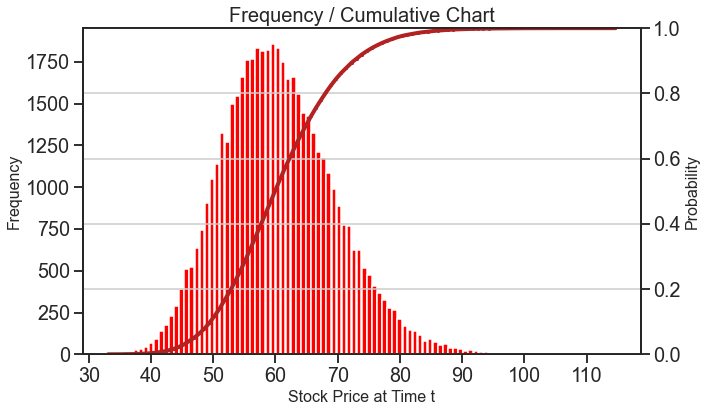

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


class Histplot:
    def __init__(self, x_data, num_bins, linetype='ro-', title=None, xlabel=None, ylabels=None, fsize=(20, 20), df_line=1):
        """
        :param x_data: data x list
                 :param num_bins: the number of x groups
                 :param linetype: The style of the cumulative frequency curve, the default is red solid point
                 :param legends: legend name, default is "linear fitting result", "actual measured value"
                 :param xlabel: the name of the x axis title, default is "data x"
                 :param ylabels: double y axis title name, the default is "count", "cumulative frequency"
                 :param df_line: Whether to display the cumulative frequency curve
        """
        if title is None:
            title = "Frequency / Cumulative Chart"
        if xlabel is None:
            xlabel = "Stock Price at Time t"
        if ylabels is None:
            ylabels = ["Frequency", "Probability"]
        self.x_data = x_data
        self.num_bins = num_bins
        self.linetype = linetype
        self.fsize = fsize
        self.title = title
        self.xlabel = xlabel
        self.ylabels = ylabels
        self.df_line = df_line

    def change_title(self, new_title):
        # Change the title name to new_legends
        self.title = new_title

    def change_ylabel(self, new_labels):
        # Change the title of the dual y axis to new_labels
        self.ylabels = new_labels

    def change_xlabel(self, new_label):
        # Change the x-axis axis title to new_label
        self.xlabel = new_label

    def change_linetype(self, new_linetype):
        # Change the format of the cumulative frequency line to new_lintype
        self.linetype = new_linetype

    def draw_plot(self):
        fs = self.fsize  # Canvas size
        # Use the seaborn library to set the font size uniformly, which is 0.12 times of fgsize[1], that is, when the vertical size of the canvas is 1000, font_scale=1.2
        sns.set_style("ticks")
        sns.set_context("talk", font_scale=fs[1]*0.2)

        # Set canvas
        fig, ax = plt.subplots(figsize=fs)

        # ax: draw frequency histogram, not selectable
        n, bins, patches = ax.hist(self.x_data, self.num_bins, color = "red", rwidth=0.9, label=self.title[0])
        ax.set_title(self.title, fontsize=20)
        ax.set_xlabel(self.xlabel, fontsize=16)
        ax.set_ylabel(self.ylabels[0],  fontsize=16)

        # ax2: Draw cumulative frequency curve, optional
        if self.df_line:
            leiji_n = [sum(n[:i]) / M for i in range(len(n) + 1)]
            ax2 = ax.twinx()
            ax2.plot(bins, leiji_n, self.linetype, ms=fs[0]*0.2, color="firebrick", linewidth=4, label=self.title[0])
            ax2.set_ylim(0, 1)
            ax2.set_ylabel(self.ylabels[1], fontsize=16)

        # Display multiple legends
        # fig.legend(loc=1, bbox_to_anchor=(1, 1), bbox_transform=ax.transAxes)
        # fig.tight_layout()
        plt.grid()
        plt.show()


if __name__ == "__main__":
    bins = 100  # Data grouping
    plot1 = Histplot(df['ST1'], num_bins=bins, fsize=(10, 6))
    plot1.draw_plot()

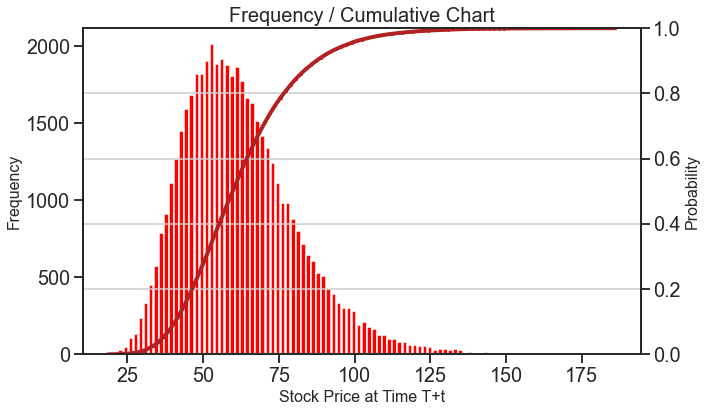

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


class Histplot:
    def __init__(self, x_data, num_bins, linetype='ro-', title=None, xlabel=None, ylabels=None, fsize=(20, 20), df_line=1):
        """
        :param x_data: data x list
                 :param num_bins: the number of x groups
                 :param linetype: The style of the cumulative frequency curve, the default is red solid point
                 :param legends: legend name, default is "linear fitting result", "actual measured value"
                 :param xlabel: the name of the x axis title, default is "data x"
                 :param ylabels: double y axis title name, the default is "count", "cumulative frequency"
                 :param df_line: Whether to display the cumulative frequency curve
        """
        if title is None:
            title = "Frequency / Cumulative Chart"
        if xlabel is None:
            xlabel = "Stock Price at Time T+t"
        if ylabels is None:
            ylabels = ["Frequency", "Probability"]
        self.x_data = x_data
        self.num_bins = num_bins
        self.linetype = linetype
        self.fsize = fsize
        self.title = title
        self.xlabel = xlabel
        self.ylabels = ylabels
        self.df_line = df_line

    def change_title(self, new_title):
        # Change the title name to new_legends
        self.title = new_title

    def change_ylabel(self, new_labels):
        # Change the title of the dual y axis to new_labels
        self.ylabels = new_labels

    def change_xlabel(self, new_label):
        # Change the x-axis axis title to new_label
        self.xlabel = new_label

    def change_linetype(self, new_linetype):
        # Change the format of the cumulative frequency line to new_lintype
        self.linetype = new_linetype

    def draw_plot(self):
        fs = self.fsize  # Canvas size
        # Use the seaborn library to set the font size uniformly, which is 0.12 times of fgsize[1], that is, when the vertical size of the canvas is 1000, font_scale=1.2
        sns.set_style("ticks")
        sns.set_context("talk", font_scale=fs[1]*0.2)

        # Set canvas
        fig, ax = plt.subplots(figsize=fs)

        # ax: draw frequency histogram, not selectable
        n, bins, patches = ax.hist(self.x_data, self.num_bins, color = "red", rwidth=0.9, label=self.title[0])
        ax.set_title(self.title, fontsize=20)
        ax.set_xlabel(self.xlabel, fontsize=16)
        ax.set_ylabel(self.ylabels[0],  fontsize=16)

        # ax2: Draw cumulative frequency curve, optional
        if self.df_line:
            leiji_n = [sum(n[:i]) / M for i in range(len(n) + 1)]
            ax2 = ax.twinx()
            ax2.plot(bins, leiji_n, self.linetype, ms=fs[0]*0.2, color="firebrick", linewidth=4, label=self.title[0])
            ax2.set_ylim(0, 1)
            ax2.set_ylabel(self.ylabels[1], fontsize=16)

        # Display multiple legends
        # fig.legend(loc=1, bbox_to_anchor=(1, 1), bbox_transform=ax.transAxes)
        # fig.tight_layout()
        plt.grid()
        plt.show()


if __name__ == "__main__":
    bins = 100  # Data grouping
    plot1 = Histplot(df['ST2'], num_bins=bins, fsize=(10, 6))
    plot1.draw_plot()

In [13]:
df['Payoff'] = 0.00000
for i in range(0,M):
    if df['ST2'][i] > df['K'][i]:
        df['Payoff'][i] = (df['ST2'][i]-df['K'][i])
    else:
        df['Payoff'][i] = 0.0000
df['PV1'] = np.exp(-r*T)*df['Payoff']
df['PV2'] = np.exp(-q*t)*df['PV1']
df

,S0,Normsinv1,ST1,Normsinv2,K,ST2,Payoff,PV1,PV2
0,60.0,0.063733,60.500674,-0.349853,66.550742,55.037245,0.000000,0.000000,0.000000
1,60.0,-0.305911,57.237421,1.108485,62.961163,76.054535,13.093372,12.330873,12.208179
2,60.0,0.580949,65.381342,-0.835115,71.919477,52.432033,0.000000,0.000000,0.000000
3,60.0,-0.808908,53.077782,-0.231879,58.385560,49.787530,0.000000,0.000000,0.000000
4,60.0,-0.836891,52.855458,0.758367,58.141003,64.125404,5.984401,5.635896,5.579818
...,...,...,...,...,...,...,...,...,...
49995,60.0,-1.350125,48.939055,0.554600,53.832961,56.312415,2.479454,2.335062,2.311828
49996,60.0,2.494879,87.123484,0.452055,95.835832,97.614276,1.778444,1.674875,1.658210
49997,60.0,0.618173,65.747422,2.725034,72.322165,132.960895,60.638731,57.107406,56.539178
49998,60.0,1.353979,73.419640,0.203889,80.761605,77.123921,0.000000,0.000000,0.000000


In [14]:
Call = np.mean(df['PV2'])
print("The value of the forward start option is:","{:.4f}".format(Call))

The value of the forward start option is: 4.4160


In [15]:
Error = np.std(df['PV2'])/np.sqrt(M)
print("The stochastic error of the forward start option is:","{:.4f}".format(Error))

The stochastic error of the forward start option is: 0.0410


In [16]:
Prob = sum(df['Payoff']>0)/M
print("The probability to exercise the forward start option is:","{:.2%}".format(Prob))

The probability to exercise the forward start option is: 35.07%


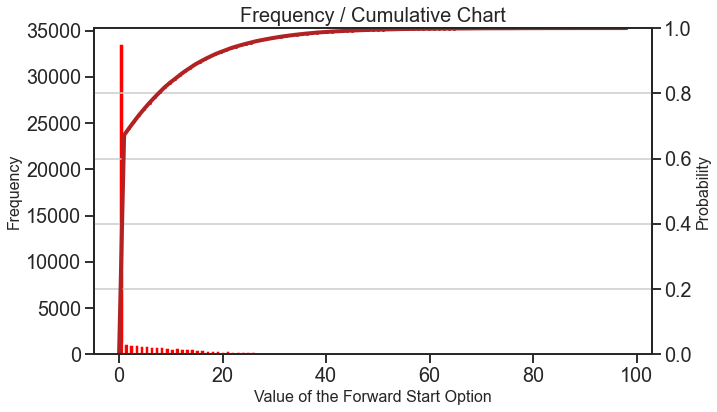

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


class Histplot:
    def __init__(self, x_data, num_bins, linetype='ro-', title=None, xlabel=None, ylabels=None, fsize=(20, 20), df_line=1):
        """
        :param x_data: data x list
                 :param num_bins: the number of x groups
                 :param linetype: The style of the cumulative frequency curve, the default is red solid point
                 :param legends: legend name, default is "linear fitting result", "actual measured value"
                 :param xlabel: the name of the x axis title, default is "data x"
                 :param ylabels: double y axis title name, the default is "count", "cumulative frequency"
                 :param df_line: Whether to display the cumulative frequency curve
        """
        if title is None:
            title = "Frequency / Cumulative Chart"
        if xlabel is None:
            xlabel = "Value of the Forward Start Option"
        if ylabels is None:
            ylabels = ["Frequency", "Probability"]
        self.x_data = x_data
        self.num_bins = num_bins
        self.linetype = linetype
        self.fsize = fsize
        self.title = title
        self.xlabel = xlabel
        self.ylabels = ylabels
        self.df_line = df_line

    def change_title(self, new_title):
        # Change the title name to new_legends
        self.title = new_title

    def change_ylabel(self, new_labels):
        # Change the title of the dual y axis to new_labels
        self.ylabels = new_labels

    def change_xlabel(self, new_label):
        # Change the x-axis axis title to new_label
        self.xlabel = new_label

    def change_linetype(self, new_linetype):
        # Change the format of the cumulative frequency line to new_lintype
        self.linetype = new_linetype

    def draw_plot(self):
        fs = self.fsize  # Canvas size
        # Use the seaborn library to set the font size uniformly, which is 0.12 times of fgsize[1], that is, when the vertical size of the canvas is 1000, font_scale=1.2
        sns.set_style("ticks")
        sns.set_context("talk", font_scale=fs[1]*0.2)

        # Set canvas
        fig, ax = plt.subplots(figsize=fs)

        # ax: draw frequency histogram, not selectable
        n, bins, patches = ax.hist(self.x_data, self.num_bins, color = "red", rwidth=0.9, label=self.title[0])
        ax.set_title(self.title, fontsize=20)
        ax.set_xlabel(self.xlabel, fontsize=16)
        ax.set_ylabel(self.ylabels[0],  fontsize=16)

        # ax2: Draw cumulative frequency curve, optional
        if self.df_line:
            leiji_n = [sum(n[:i]) / M for i in range(len(n) + 1)]
            ax2 = ax.twinx()
            ax2.plot(bins, leiji_n, self.linetype, ms=fs[0]*0.2, color="firebrick", linewidth=4, label=self.title[0])
            ax2.set_ylim(0, 1)
            ax2.set_ylabel(self.ylabels[1], fontsize=16)

        # Display multiple legends
        # fig.legend(loc=1, bbox_to_anchor=(1, 1), bbox_transform=ax.transAxes)
        # fig.tight_layout()
        plt.grid()
        plt.show()


if __name__ == "__main__":
    bins = 100  # Data grouping
    plot1 = Histplot(df['PV2'], num_bins=bins, fsize=(10, 6))
    plot1.draw_plot()